In [ ]:
Ss#importing libraries
import sys
import pandas as pd
import sklearn
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])
adu = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Adult-Data.csv",na_values=['?'])

Mounted at /content/drive/


In [ ]:
import pandas as pd
print(pd.DataFrame(adu).isnull().sum())  # Check missing values per feature


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [ ]:
adu['age'].fillna(adu['age'].median(), inplace=True)  # Use Median


<ipython-input-7-4142ae4935c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adu['age'].fillna(adu['age'].median(), inplace=True)  # Use Median


In [ ]:
print(adu.isnull().sum())


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          95
jundice             0
austim              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [ ]:
print("Number of duplicate rows:", adu.duplicated().sum())
adu = adu.drop_duplicates()
print("Number of duplicate rows:", adu.duplicated().sum())


Number of duplicate rows: 5
Number of duplicate rows: 0


In [ ]:
import pandas as pd
print(pd.DataFrame(ch).isnull().sum())  # Check missing values per feature


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64


In [ ]:
ch['age'].fillna(ch['age'].median(), inplace=True)  # Use Median


<ipython-input-15-f9b4bcf229d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ch['age'].fillna(ch['age'].median(), inplace=True)  # Use Median


In [ ]:
print(ch.isnull().sum())


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          43
jundice             0
austim              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64


In [ ]:
print("Number of duplicate rows:", ch.duplicated().sum())
ch = ch.drop_duplicates()
print("Number of duplicate rows:", ch.duplicated().sum())


Number of duplicate rows: 2
Number of duplicate rows: 0


In [ ]:
frames = [ch,adu]
data = pd.concat(frames)

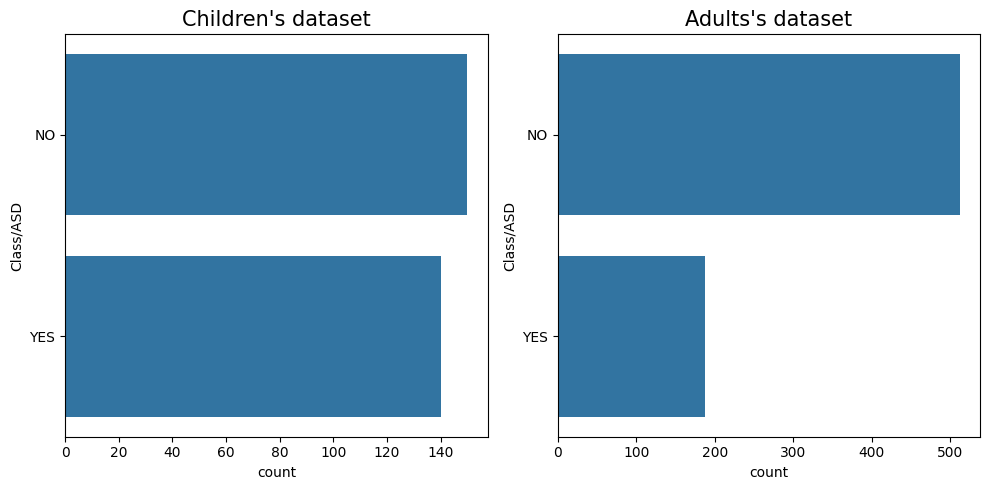

In [ ]:
#Data distribution
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.countplot(ch['Class/ASD'],ax=ax[0])
sns.countplot(adu['Class/ASD'],ax=ax[1])
ax[0].set_title("Children's dataset",fontsize = 15)
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('distribution.pdf', transparent=True, dpi=300)

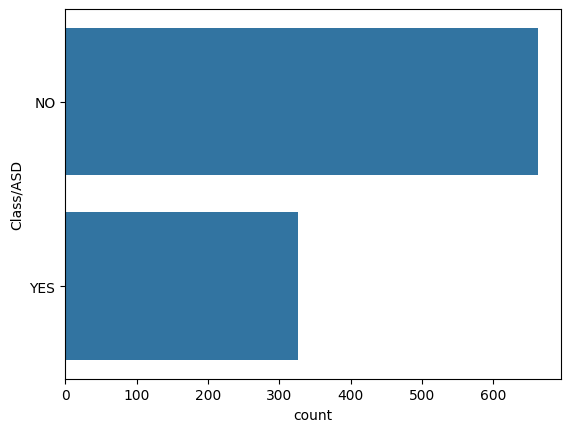

In [ ]:
sns.countplot(data['Class/ASD'])
plt.savefig('combined_dataset.pdf', transparent=True, dpi=300)

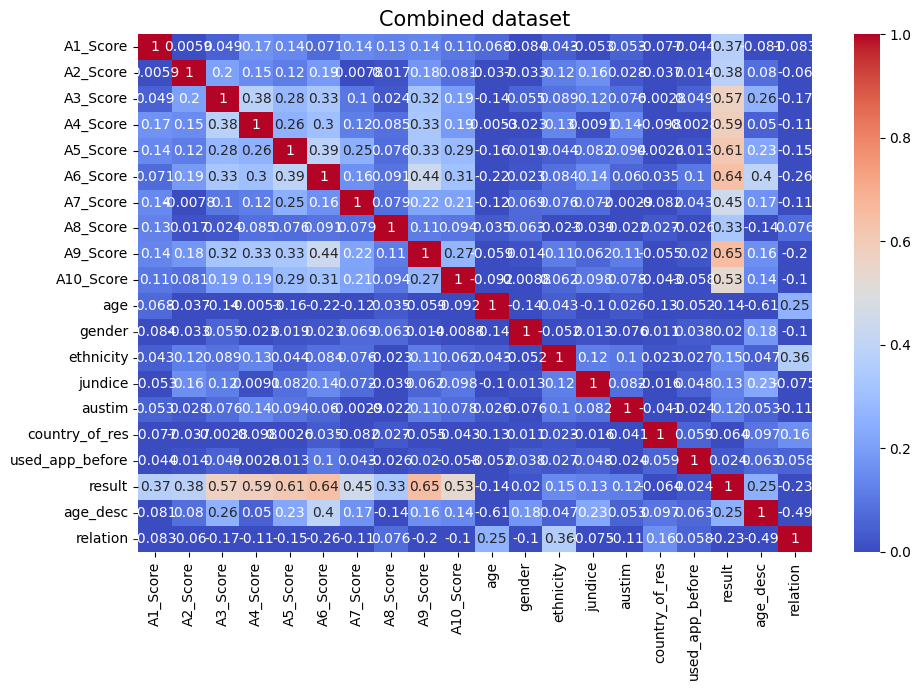

In [ ]:
# Select only numeric columns from 'final' DataFrame
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# Plot heatmap for the combined dataset
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)  # Adjust vmin=-1 and vmax=1
ax.set_title("Combined dataset", fontsize=15)

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('correlation_final.pdf', transparent=True, dpi=300)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assume 'data' is your dataset
y = data['Class/ASD']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if feature != 'Class/ASD':  # Exclude target variable
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

# Feature names (excluding target)
feature_names = data.drop(columns=['Class/ASD']).columns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data.drop('Class/ASD', axis=1), y)

# Get feature importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort descending

# Print feature names with their importance scores
print("Feature Importance Ranking:")
for i in range(15):  # Show top 10
    feature_name = feature_names[sorted_indices[i]]
    importance_score = feature_importances[sorted_indices[i]]
    print(f"{i+1}. {feature_name}: {importance_score:.4f}")


Feature Importance Ranking:
1. result: 0.5502
2. A9_Score: 0.0864
3. A6_Score: 0.0831
4. A5_Score: 0.0599
5. A4_Score: 0.0562
6. A3_Score: 0.0326
7. A10_Score: 0.0251
8. A1_Score: 0.0195
9. A7_Score: 0.0189
10. A8_Score: 0.0125
11. age: 0.0118
12. A2_Score: 0.0108
13. country_of_res: 0.0105
14. ethnicity: 0.0091
15. relation: 0.0047


In [ ]:
# Handle missing values BEFORE splitting
# --------------------------------------
# 1. Check for missing values
print("Missing values before handling:")
print(data[selected_features].isnull().sum())

# 2. Impute missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['country_of_res'].fillna('Unknown', inplace=True)  # Add new category for missing

# 3. Verify no missing values remain
print("\nMissing values after handling:")
print(data[selected_features].isnull().sum())


Missing values before handling:
A9_Score          0
A6_Score          0
A5_Score          0
A3_Score          0
A10_Score         0
A1_Score          0
A7_Score          0
A8_Score          0
age               0
A2_Score          0
country_of_res    0
dtype: int64

Missing values after handling:
A9_Score          0
A6_Score          0
A5_Score          0
A3_Score          0
A10_Score         0
A1_Score          0
A7_Score          0
A8_Score          0
age               0
A2_Score          0
country_of_res    0
dtype: int64


<ipython-input-25-b3c17e529c89>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-25-b3c17e529c89>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

**IMPORTING LIBRARIES**

In [ ]:
!pip install tensorflow
import tensorflow as tf

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Components
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, log_loss, confusion_matrix
)

# Keras Components
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization,
    Input, Add, Activation, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

**SELECTED FEATURES**

In [ ]:
selected_features = [
    "A9_Score", "A6_Score", "A5_Score", "A3_Score", "A10_Score",
    "A1_Score", "A7_Score","A8_Score","age", "A2_Score", "country_of_res"
]

**X AND Y INPUT**

In [ ]:
# Convert scores and prepare data
for feature in selected_features:
    if '_Score' in feature:
        data[feature] = data[feature].astype(int)

X = pd.get_dummies(data[selected_features])
y = data['Class/ASD'].map({'YES': 1, 'NO': 0})

**DENSE MODEL**

Resampled classes: [529 529]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6222 - loss: 0.6378

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6387 - loss: 0.6275 - val_accuracy: 0.6368 - val_loss: 0.6721
Epoch 2/50
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.3652 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9009 - loss: 0.3628 - val_accuracy: 0.7075 - val_loss: 0.5620
Epoch 3/50
22/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9197 - loss: 0.2418 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9222 - loss: 0.2367 - val_accuracy: 0.7783 - val_loss: 0.5035
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9388 - loss: 0.1759 - val_accuracy: 0.7736 - val_loss: 0.5131
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9527 - loss: 0.1417 - val_accuracy: 0.7689 - val_loss: 0.5621
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9566 - loss: 0.1261 - val_accuracy: 0.7500 - val_loss: 0.5688
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9469 - loss: 0.1265 - val_accuracy: 0.7453 - val_loss: 0.6023
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9632 - loss: 0.1066 - val_accuracy: 0.7406 - val_loss: 0.6014
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9568 - loss: 0.1230 - val_accuracy: 0.7311 - val_loss: 0.6240
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9487 - loss: 0.1239 - val_accuracy: 0.7264 - val_loss: 0.6177
Ep

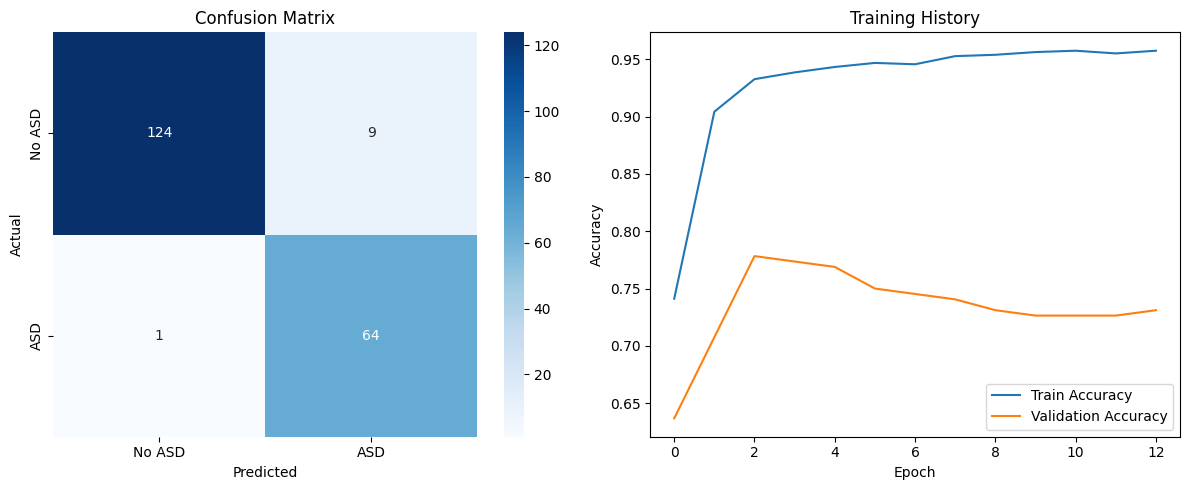

In [ ]:
# Split Data Before Scaling & Oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE (Corrected strategy)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Resampled classes:", np.bincount(y_train))


# Feature Scaling (AFTER splitting to avoid data leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Dense Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_dense_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Compute Metrics
dense_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Corrected Metrics in Tabular Format
print("\nTraining Accuracy: {:.2f}%".format(train_acc * 100))
print("Testing Accuracy: {:.2f}%\n".format(test_acc * 100))

print("{:<20} {:<10}".format("Metric", "Value"))
print("=" * 35)
for metric, value in dense_metrics.items():
    if metric != 'Confusion Matrix':
        print("{:<20} {:.2f}".format(metric, value))

# Visualization
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dense_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**DROPOUT MODEL**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5517 - loss: 0.6965 - val_accuracy: 0.8726 - val_loss: 0.5027
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7813 - loss: 0.5082 - val_accuracy: 0.9104 - val_loss: 0.3227
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8579 - loss: 0.3591 - val_accuracy: 0.9151 - val_loss: 0.2381
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8429 - loss: 0.3565 - val_accuracy: 0.9245 - val_loss: 0.2072
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8780 - loss: 0.2878 - val_accuracy: 0.9198 - val_loss: 0.1934
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9037 - loss: 0.2568 - val_accuracy: 0.9198 - val_loss: 0.1922
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9128 - loss: 0.2305 - val_accuracy: 0.9245 - val_loss: 0.1921
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8875 - loss: 0.2780 - val_accuracy: 0.9245 - val_loss: 0.1907


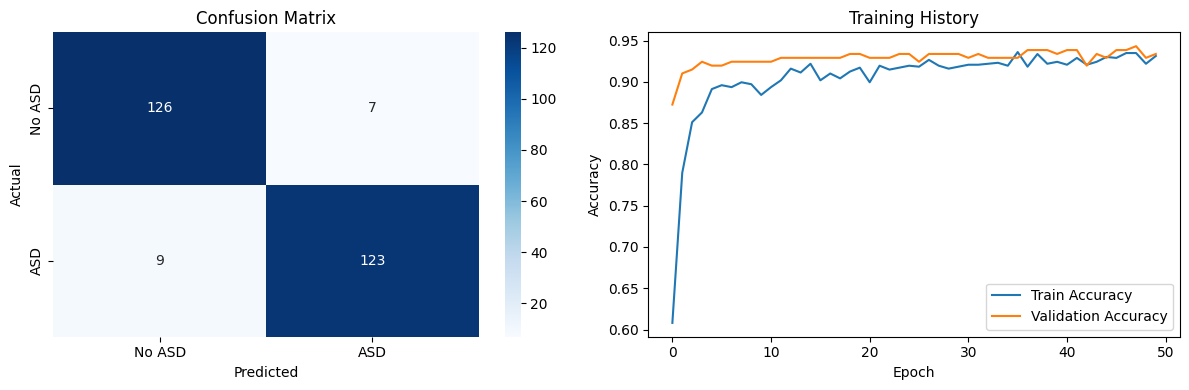

In [ ]:


# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
dropout_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in dropout_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**BATCH NORMALIZATION**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7172 - loss: 0.6161 - val_accuracy: 0.8821 - val_loss: 0.3935
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8464 - loss: 0.3082 - val_accuracy: 0.9009 - val_loss: 0.3177
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8967 - loss: 0.2429 - val_accuracy: 0.9198 - val_loss: 0.2761
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9079 - loss: 0.2315 - val_accuracy: 0.9340 - val_loss: 0.2441
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9151 - loss: 0.2019 - val_accuracy: 0.9340 - val_loss: 0.2212
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9089 - loss: 0.2124 - val_accuracy: 0.9434 - val_loss: 0.2064
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9121 - loss: 0.1996 - val_accuracy: 0.9387 - val_loss: 0.1993
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9124 - loss: 0.2044 - val_accuracy: 0.9340 - val_loss: 0.1939
Ep

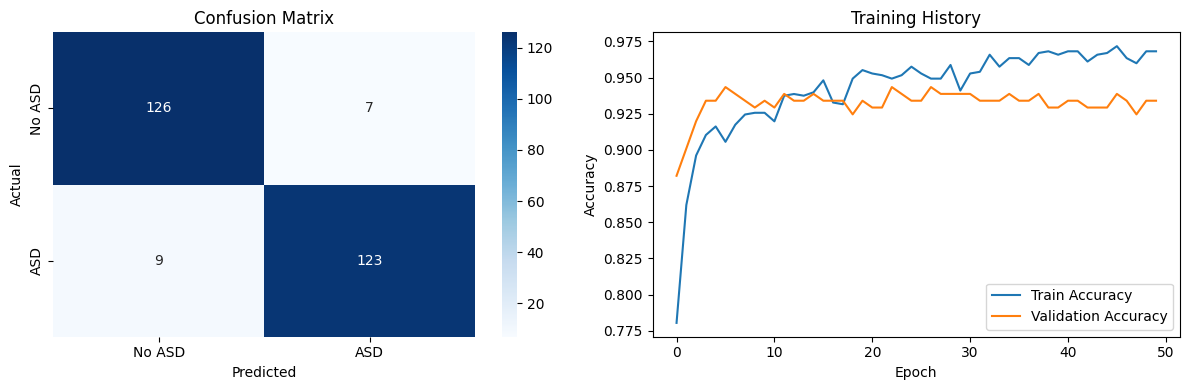

In [ ]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Convert to one-hot encoding for categorical crossentropy
y_res = to_categorical(y_res)  # 🔥 Critical change for softmax

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    random_state=42,
    stratify=y_res  # Stratify on original class distribution
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================================================
# Batch Normalization Model
# ==============================================================
batch_norm_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')  # 2 units for one-hot encoding
])

# Compile with lower learning rate
batch_norm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = batch_norm_model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs for better convergence
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate
train_loss, train_acc = batch_norm_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = batch_norm_model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = batch_norm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert y_test back from one-hot for metrics
y_test_labels = np.argmax(y_test, axis=1)

# Calculate metrics
batch_norm_metrics = {
    'Accuracy (%)': accuracy_score(y_test_labels, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test_labels, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test_labels, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test_labels, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test_labels, y_pred_probs[:, 1]) * 100,  # Use probability for ROC AUC
    'Log Loss': log_loss(y_test_labels, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test_labels, y_pred_classes)
}
# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in batch_norm_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**LSTM**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8801 - loss: 0.5909 - val_accuracy: 0.9009 - val_loss: 0.2661
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8874 - loss: 0.2597 - val_accuracy: 0.9151 - val_loss: 0.2371
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8971 - loss: 0.2390 - val_accuracy: 0.9057 - val_loss: 0.2228
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8911 - loss: 0.2348 - val_accuracy: 0.9151 - val_loss: 0.2159
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8846 - loss: 0.2544 - val_accuracy: 0.9009 - val_loss: 0.2288
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8883 - loss: 0.2211 - val_accuracy: 0.9104 - val_loss: 0.2179
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8806 - loss: 0.2440 - val_accuracy: 0.9104 - val_loss: 0.2256
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8876 - loss: 0.2547 - val_accuracy: 0.9151 - val_loss: 0.

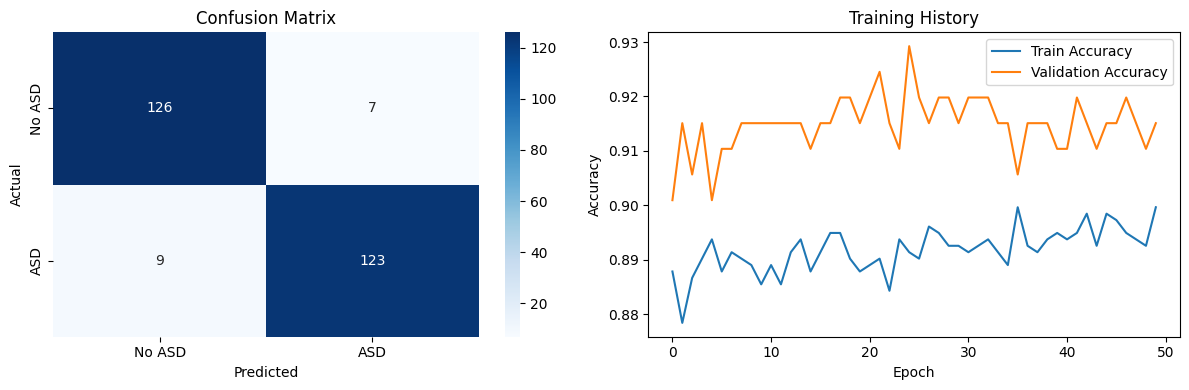

In [ ]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
lstm_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in lstm_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**RESIDUAL MODEL**

Epoch 1/50
24/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4685 - loss: 1.0625

27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.4708 - loss: 1.0518 - val_accuracy: 0.7925 - val_loss: 0.6190
Epoch 2/50
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5797 - loss: 0.7697

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5816 - loss: 0.7672 - val_accuracy: 0.9292 - val_loss: 0.5154
Epoch 3/50
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6541 - loss: 0.6278

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6550 - loss: 0.6259 - val_accuracy: 0.9434 - val_loss: 0.4287
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7133 - loss: 0.5637

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7137 - loss: 0.5628 - val_accuracy: 0.9528 - val_loss: 0.3514
Epoch 5/50
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7330 - loss: 0.5060

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7357 - loss: 0.5038 - val_accuracy: 0.9434 - val_loss: 0.2985
Epoch 6/50
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8137 - loss: 0.4150

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8126 - loss: 0.4155 - val_accuracy: 0.9434 - val_loss: 0.2658
Epoch 7/50
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8120 - loss: 0.4127

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8126 - loss: 0.4111 - val_accuracy: 0.9245 - val_loss: 0.2523
Epoch 8/50
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8710 - loss: 0.3208

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8692 - loss: 0.3249 - val_accuracy: 0.9198 - val_loss: 0.2475
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8574 - loss: 0.3471 - val_accuracy: 0.8915 - val_loss: 0.2557
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8444 - loss: 0.3574 - val_accuracy: 0.8538 - val_loss: 0.2763
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8918 - loss: 0.3025 - val_accuracy: 0.8538 - val_loss: 0.2908
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9078 - loss: 0.2712 - val_accuracy: 0.8396 - val_loss: 0.3039
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9183 - loss: 0.2812 - val_accuracy: 0.8160 - val_loss: 0.3275
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9037 - loss: 0.2757 - val_accuracy: 0.8113 - val_loss: 0.3473
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9022 - loss: 0.2443 - val_accuracy: 0.8066 - val_lo

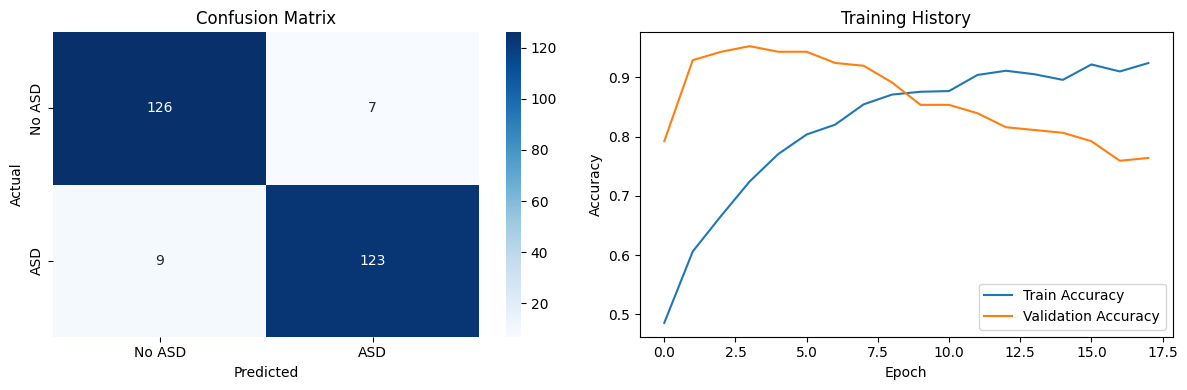

In [ ]:
# Handle Class Imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Residual Block Function
def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    if x.shape[-1] != units:
        shortcut = Dense(units)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    return Activation('relu')(x)

# Build Model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(256)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = residual_block(x, 256)
x = residual_block(x, 128)
x = residual_block(x, 64)
x = residual_block(x, 32)

output_layer = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate Metrics
residual_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in residual_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**SIGMOID MODEL**

Epoch 1/100
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7217 - loss: 0.5361

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.7396 - loss: 0.5123 - val_accuracy: 0.6651 - val_loss: 0.6223
Epoch 2/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8749 - loss: 0.2790  

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8818 - loss: 0.2693 - val_accuracy: 0.7689 - val_loss: 0.5229
Epoch 3/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9364 - loss: 0.1955 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9339 - loss: 0.1980 - val_accuracy: 0.7925 - val_loss: 0.4447
Epoch 4/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9468 - loss: 0.1513 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9406 - loss: 0.1584 - val_accuracy: 0.7783 - val_loss: 0.4260
Epoch 5/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9387 - loss: 0.1634 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9357 - loss: 0.1675 - val_accuracy: 0.7972 - val_loss: 0.3968
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9435 - loss: 0.1388 - val_accuracy: 0.8066 - val_loss: 0.4055
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9360 - loss: 0.1509 - val_accuracy: 0.8019 - val_loss: 0.3992
Epoch 8/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9269 - loss: 0.1863 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9279 - loss: 0.1827 - val_accuracy: 0.8066 - val_loss: 0.3932
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9606 - loss: 0.1172 - val_accuracy: 0.8066 - val_loss: 0.3947
Epoch 10/100
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9486 - loss: 0.1270 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9461 - loss: 0.1323 - val_accuracy: 0.8066 - val_loss: 0.3857
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9402 - loss: 0.1397 - val_accuracy: 0.8066 - val_loss: 0.3893
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9523 - loss: 0.1320 - val_accuracy: 0.8066 - val_loss: 0.3993
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9494 - loss: 0.1293 - val_accuracy: 0.7972 - val_loss: 0.4086
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9430 - loss: 0.1209 - val_accuracy: 0.8019 - val_loss: 0.4258
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9499 - loss: 0.1188 - val_accuracy: 0.7925 - val_loss: 0.4289
Epoch 16/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9419 - loss: 0.1208 - val_accuracy: 0.7972 - val_loss: 0.4520
Epoch 17/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9610 - loss: 0.1289 - val_accuracy: 0.7972 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step

Training Accuracy: 92.63%
Testing Accuracy: 94.44%

Detailed Metrics:
Accuracy (%): 94.44
Precision (%): 85.53
Recall (%): 100.00
F1 Score (%): 92.20
ROC AUC (%): 98.55
Log Loss: 0.19


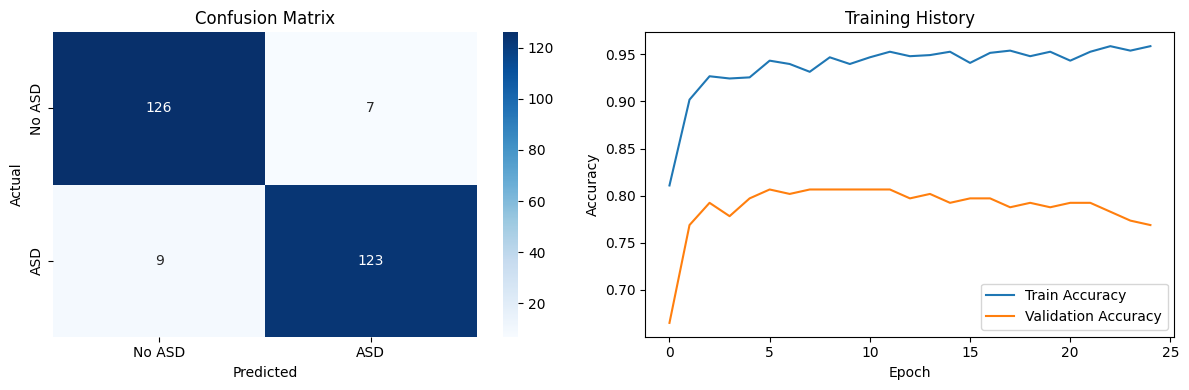

In [ ]:

# Handle Class Imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid Model Architecture
def build_sigmoid_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Dense(256)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs=inputs, outputs=outputs)

# Build and Compile Model
model = build_sigmoid_model((X_train.shape[1],))  # Notice the tuple format
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_sigmoid_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate Metrics
sigmoid_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in sigmoid_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dropout_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**COMPARISON METRICS**

In [ ]:
import pandas as pd

# Combine all model metrics
model_metrics = {
    'Batch Norm': batch_norm_metrics,
    'Dropout': dropout_metrics,
    'Dense': dense_metrics,
    'LSTM': lstm_metrics,
    'Residual': residual_metrics,
    'Sigmoid': sigmoid_metrics
}

# Convert to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Print metrics in tabular form
print("\nModel Evaluation Metrics:\n")
print(df_metrics.T)  # Transpose for better readability



Model Evaluation Metrics:

           Accuracy (%) Precision (%) Recall (%) F1 Score (%) ROC AUC (%)  \
Batch Norm    90.943396     89.781022  92.481203    91.111111   97.223172   
Dropout       93.962264     94.615385  93.181818     93.89313   98.373775   
Dense         94.949495     87.671233  98.461538    92.753623   98.924234   
LSTM          93.207547     91.911765   94.69697    93.283582   97.826954   
Residual      85.353535     69.148936      100.0    81.761006   97.744361   
Sigmoid       94.444444     85.526316      100.0    92.198582   98.554078   

            Log Loss        Confusion Matrix  
Batch Norm  0.249044  [[118, 14], [10, 123]]  
Dropout     0.169654    [[126, 7], [9, 123]]  
Dense       0.168747     [[124, 9], [1, 64]]  
LSTM        0.184441   [[122, 11], [7, 125]]  
Residual    0.424015    [[104, 29], [0, 65]]  
Sigmoid     0.190117    [[122, 11], [0, 65]]  
